In [16]:
# folder_name="/content/drive/MyDrive/Collab/ML/CAPSTONE_PROJECT_AI_Image_Caption_Bot/"
folder_name="./"

In [17]:
import pandas as pd
import numpy as np
import keras
import json
import os
import pickle
import matplotlib.pyplot as plt
import cv2
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.layers.merge import add

In [18]:
model = load_model(folder_name+"Data/model_9.h5")

In [19]:
model_temp = ResNet50(weights="imagenet", input_shape=(224,224,3))

# Create a new model, by removing the last layer (output layer of 1000 classes) from the resnet50
model_resnet = Model(model_temp.input, model_temp.layers[-2].output)

In [20]:
def preprocess_image(img):
    img = image.load_img(img, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def encode_image(img):
    img = preprocess_image(img)
    feature_vector = model_resnet.predict(img)
    feature_vector = feature_vector.reshape(1, feature_vector.shape[1])
    return feature_vector


with open(folder_name+ "Data/word_to_idx.pkl", 'rb') as w2i:
    word_to_idx = pickle.load(w2i)
    
with open(folder_name+"Data/idx_to_word.pkl", 'rb') as i2w:
    idx_to_word = pickle.load(i2w)


def predict_caption(photo):
    in_text = "startseq"
    max_len = 35
    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')

        ypred =  model.predict([photo,sequence])
        ypred = ypred.argmax()
        word = idx_to_word[ypred]
        in_text+= ' ' +word
        
        if word =='endseq':
            break     
        
    final_caption =  in_text.split()
    final_caption = final_caption[1:-1]
    final_caption = ' '.join(final_caption)
    
    return final_caption

def caption_this_image(image):

    enc = encode_image(image)
    caption = predict_caption(enc)
    
    return caption

In [25]:
filenames = [f for f in os.listdir(folder_name+"Images/") ]

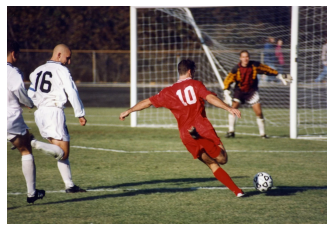

two men are playing soccer


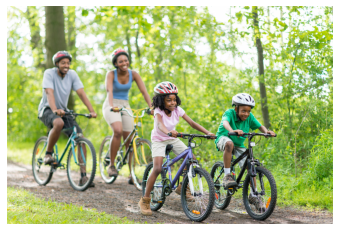

man riding bicycle down road


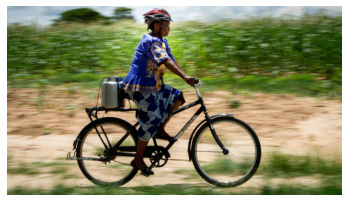

man riding bicycle in the air


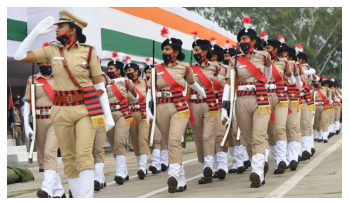

crowd of people in costumes


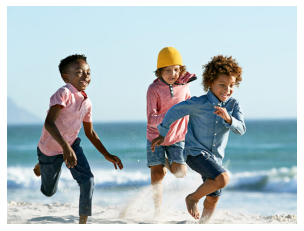

two people are playing in the sand


In [26]:
for f in filenames:
    img=cv2.imread(folder_name+"Images/"+f)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    caption = caption_this_image(folder_name+"Images/"+f)
    print(caption)